In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nfl_data_py as nfl

ModuleNotFoundError: No module named 'sklearn'

In [7]:
df_seasonal = nfl.import_seasonal_data([2021, 2022, 2023], s_type='REG')
df_seasonal.head()
df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    1862 non-null   object 
 1   season                       1862 non-null   int64  
 2   season_type                  1862 non-null   object 
 3   completions                  1862 non-null   int32  
 4   attempts                     1862 non-null   int32  
 5   passing_yards                1862 non-null   float64
 6   passing_tds                  1862 non-null   int32  
 7   interceptions                1862 non-null   float64
 8   sacks                        1862 non-null   float64
 9   sack_yards                   1862 non-null   float64
 10  sack_fumbles                 1862 non-null   int32  
 11  sack_fumbles_lost            1862 non-null   int32  
 12  passing_air_yards            1862 non-null   float64
 13  passing_yards_afte

In [8]:
columns_to_drop = ['season_type', 'sacks', 'passing_first_downs', 'sack_fumbles', 'sack_fumbles_lost', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_fumbles', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_first_downs', 'special_teams_tds',
                  'passing_air_yards', 'passing_yards_after_catch', 'passing_epa', 'pacr', 'dakota', 'sack_yards', 'rushing_epa', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_epa', 'racr', 'air_yards_share', 'wopr_x', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh', 'rfd_sh', 'rtdfd_sh', 'dom', 'w8dom', 'yptmpa', 'ppr_sh']

df_seasonal = df_seasonal.drop(columns=columns_to_drop)
df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  1862 non-null   object 
 1   season                     1862 non-null   int64  
 2   completions                1862 non-null   int32  
 3   attempts                   1862 non-null   int32  
 4   passing_yards              1862 non-null   float64
 5   passing_tds                1862 non-null   int32  
 6   interceptions              1862 non-null   float64
 7   passing_2pt_conversions    1862 non-null   int32  
 8   carries                    1862 non-null   int32  
 9   rushing_yards              1862 non-null   float64
 10  rushing_tds                1862 non-null   int32  
 11  rushing_2pt_conversions    1862 non-null   int32  
 12  receptions                 1862 non-null   int32  
 13  targets                    1862 non-null   int32

In [9]:
# check for missing values in each row
df_seasonal.isnull().sum()

player_id                    0
season                       0
completions                  0
attempts                     0
passing_yards                0
passing_tds                  0
interceptions                0
passing_2pt_conversions      0
carries                      0
rushing_yards                0
rushing_tds                  0
rushing_2pt_conversions      0
receptions                   0
targets                      0
receiving_yards              0
receiving_tds                0
receiving_2pt_conversions    0
target_share                 0
fantasy_points               0
fantasy_points_ppr           0
games                        0
dtype: int64

In [11]:
X = df_seasonal
X

,player_id,season,completions,attempts,passing_yards,passing_tds,interceptions,passing_2pt_conversions,carries,rushing_yards,...,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_2pt_conversions,target_share,fantasy_points,fantasy_points_ppr,games
0,00-0019596,2021,485,719,5316.0,43,12.0,0,28,81.0,...,0,0,0,0.0,0,0,0.000000,374.74,374.74,17
1,00-0019596,2022,490,733,4694.0,25,9.0,2,29,-1.0,...,0,0,1,0.0,0,0,0.034483,271.66,271.66,17
2,00-0022824,2021,0,0,0.0,0,0.0,0,1,0.0,...,0,0,0,0.0,0,0,0.000000,0.00,0.00,1
3,00-0022824,2022,1,1,4.0,0,0.0,0,0,0.0,...,0,0,0,0.0,0,0,0.000000,0.16,0.16,1
4,00-0022924,2021,390,605,3740.0,22,10.0,2,20,5.0,...,0,0,0,0.0,0,0,0.000000,218.10,218.10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,00-0039150,2023,315,527,2877.0,11,10.0,1,39,253.0,...,1,0,0,0.0,0,0,0.000000,156.38,156.38,16
1858,00-0039152,2023,149,255,1808.0,8,4.0,1,25,57.0,...,0,0,0,0.0,0,0,0.000000,102.02,102.02,9
1859,00-0039163,2023,319,499,4108.0,23,5.0,0,39,157.0,...,1,1,1,0.0,0,0,0.023256,274.02,275.02,15
1860,00-0039164,2023,50,84,577.0,3,1.0,2,25,136.0,...,0,0,0,0.0,0,0,0.000000,72.68,72.68,4


In [12]:
y = df_seasonal['fantasy_points_ppr']

                             season  completions  attempts  passing_yards  \
season                     1.000000     0.008897  0.009555       0.008160   
completions                0.008897     1.000000  0.998784       0.996289   
attempts                   0.009555     0.998784  1.000000       0.994795   
passing_yards              0.008160     0.996289  0.994795       1.000000   
passing_tds               -0.000332     0.964204  0.958365       0.974478   
interceptions              0.009603     0.936569  0.943031       0.933945   
passing_2pt_conversions   -0.007906     0.712141  0.714184       0.701333   
carries                    0.020805     0.124237  0.124540       0.125694   
rushing_yards              0.014964     0.123210  0.124732       0.124940   
rushing_tds                0.005512     0.196530  0.197947       0.199720   
rushing_2pt_conversions    0.019585     0.203248  0.207410       0.199267   
receptions                 0.025523    -0.202495 -0.205099      -0.200678   

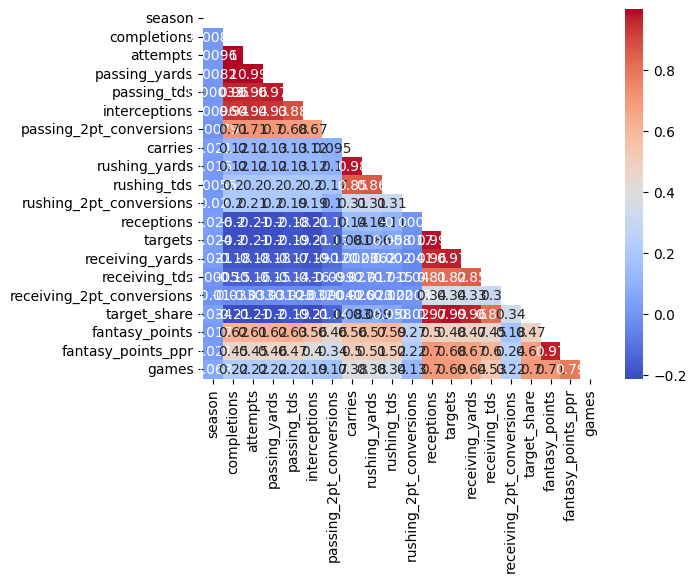

In [18]:
# the corr function returns the pearson correlation (classic linear corr)
corr = X.select_dtypes('number').corr()
print(corr)
sns.heatmap(corr, annot=True, mask=np.triu(corr), cmap='coolwarm')
plt.show()
